Using the first three minute of the tutorial from https://www.youtube.com/watch?v=SNdDa4_aN-8&t=175s&ab_channel=JustinStolpe

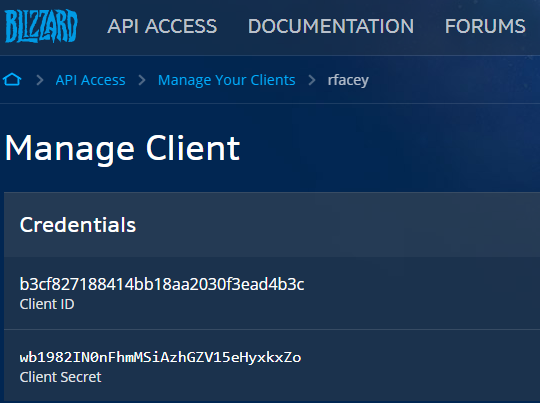


Looked for one specific item to get the idea of how the API would work. Started with Sacred Shard:
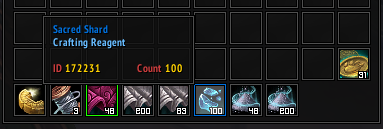

Searched the API using the documentation provided:

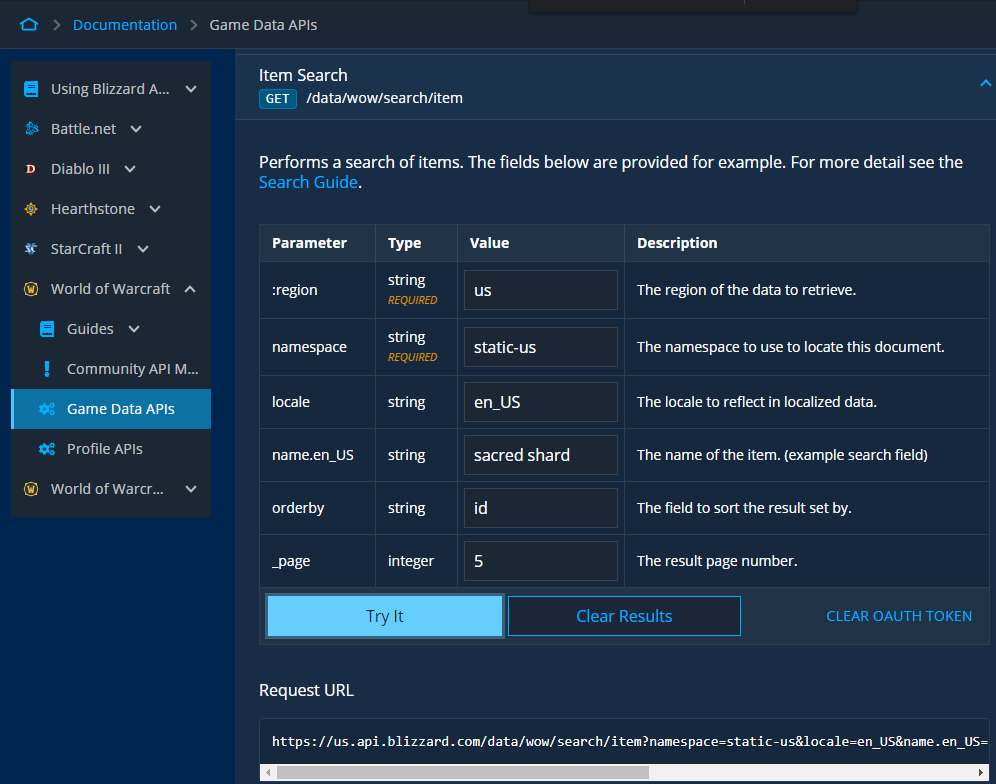

Did not initially find what I was looking for. Played around with the page number and found the item on page 5:

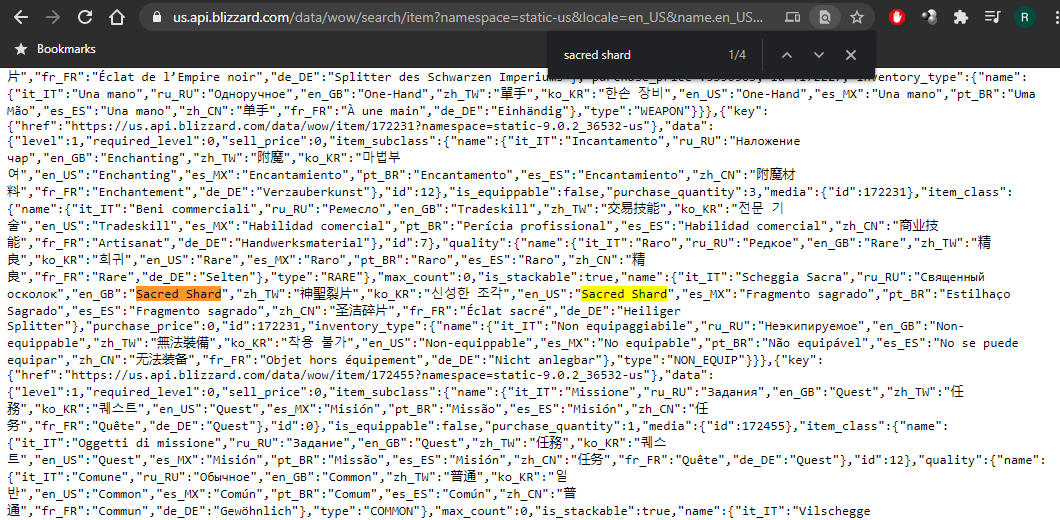

I confirmed this was the correct item by looking into another API:

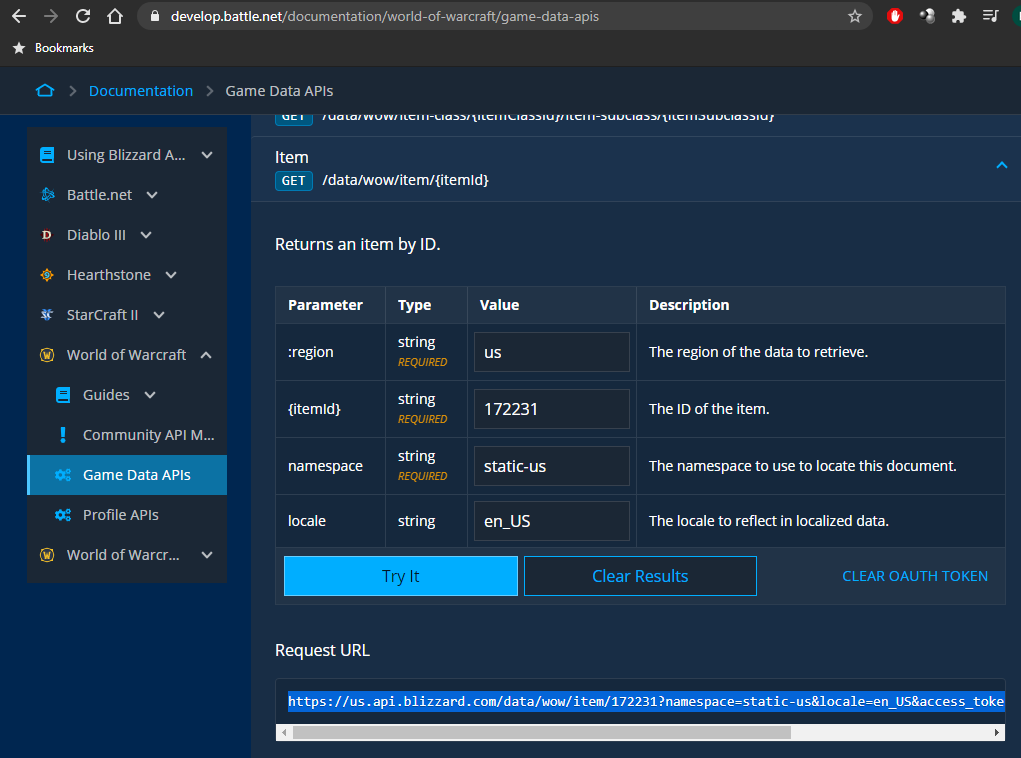

The item looks to be correct:

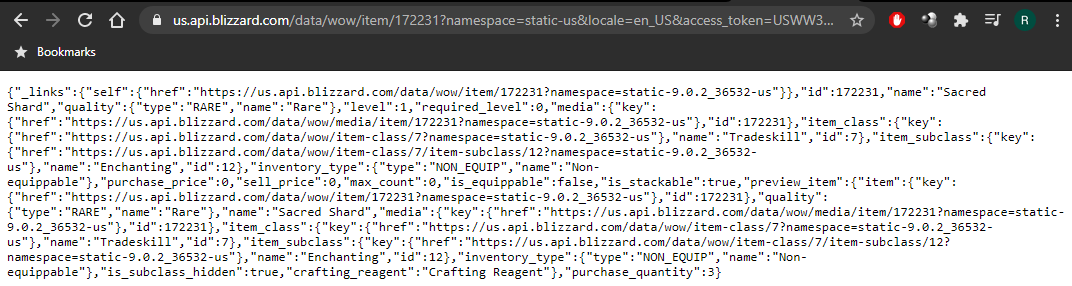

Did the same to find my server (required for the auction house data):

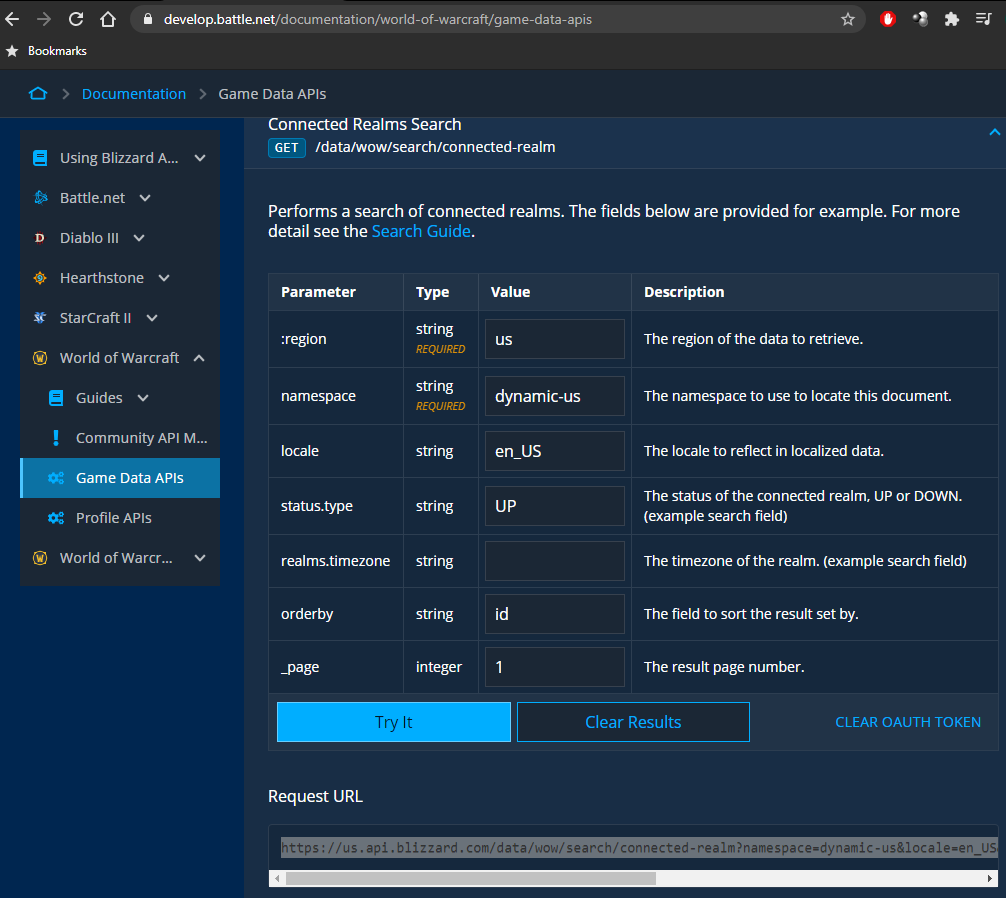

Luckily, it was on page 1:

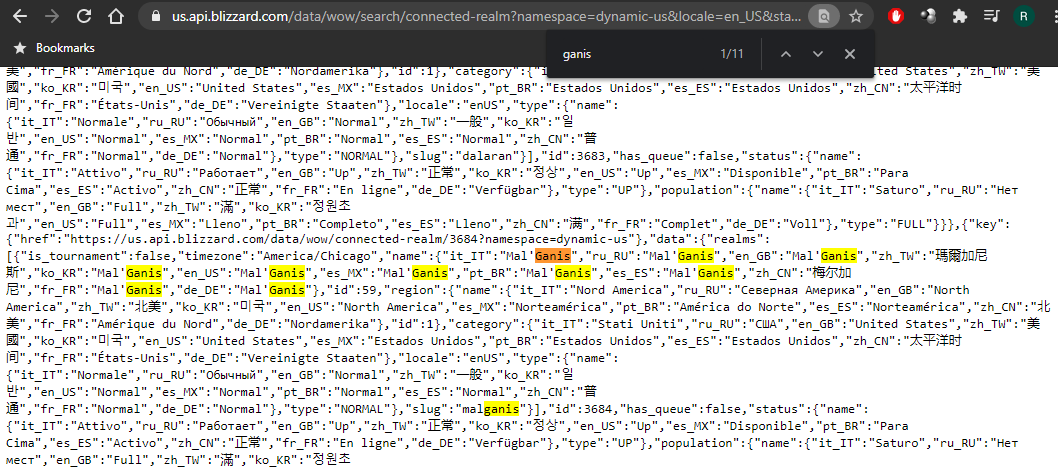

With the realm id, I was able to go back to the auction API:

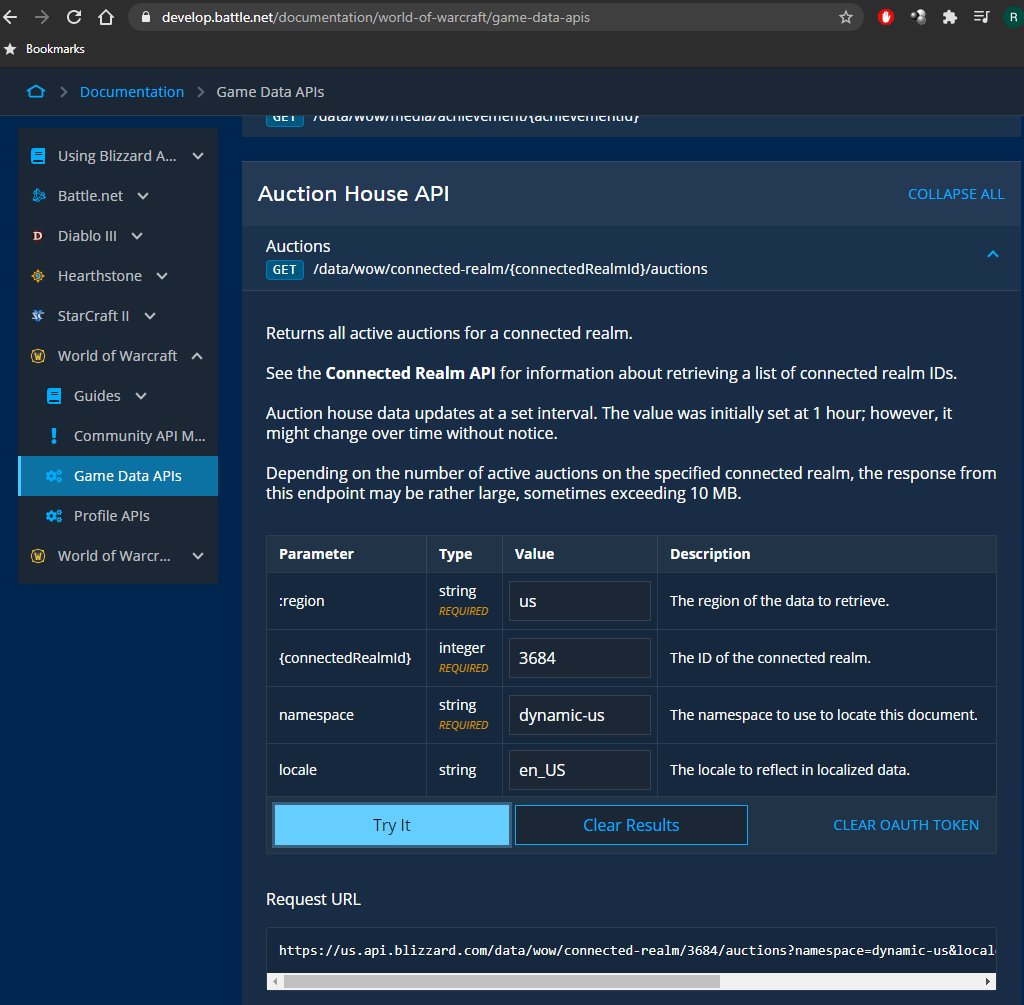

Found a couple of results:
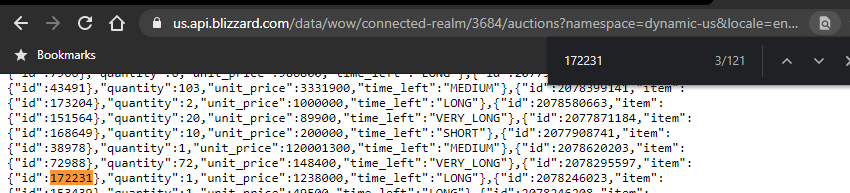

Looked into auction house to see how the numbers compare:

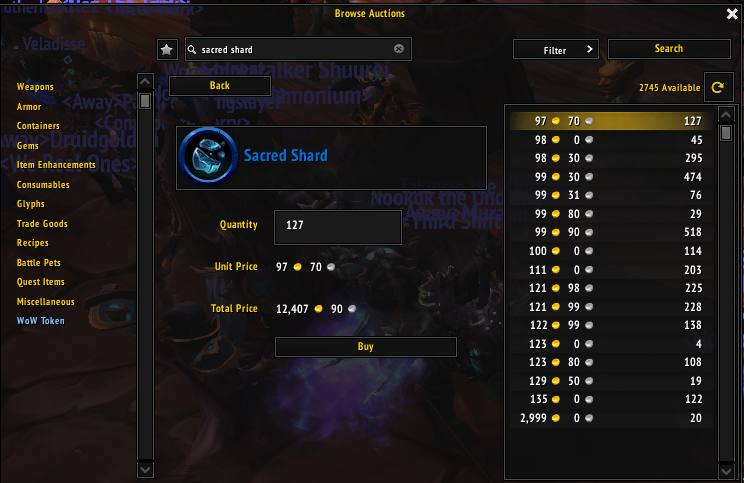

Currently assuming the raw numbers in the auction house API converts to the following:

100 Copper = 1 Silver
100 Silver = 1 Gold

Therefore, 1238000 in API unit_price = 123 Gold and 80 Silver

This is consistant with what I see in the auction house.

Next step, ETL

In [2]:
#Grabbed some of the data to play with it

data = '{"_links":{"self":{"href":"https://us.api.blizzard.com/data/wow/item/172231?namespace=static-9.0.2_36532-us"}},"id":172231,"name":"Sacred Shard","quality":{"type":"RARE","name":"Rare"},"level":1,"required_level":0,"media":{"key":{"href":"https://us.api.blizzard.com/data/wow/media/item/172231?namespace=static-9.0.2_36532-us"},"id":172231},"item_class":{"key":{"href":"https://us.api.blizzard.com/data/wow/item-class/7?namespace=static-9.0.2_36532-us"},"name":"Tradeskill","id":7},"item_subclass":{"key":{"href":"https://us.api.blizzard.com/data/wow/item-class/7/item-subclass/12?namespace=static-9.0.2_36532-us"},"name":"Enchanting","id":12},"inventory_type":{"type":"NON_EQUIP","name":"Non-equippable"},"purchase_price":0,"sell_price":0,"max_count":0,"is_equippable":false,"is_stackable":true,"preview_item":{"item":{"key":{"href":"https://us.api.blizzard.com/data/wow/item/172231?namespace=static-9.0.2_36532-us"},"id":172231},"quality":{"type":"RARE","name":"Rare"},"name":"Sacred Shard","media":{"key":{"href":"https://us.api.blizzard.com/data/wow/media/item/172231?namespace=static-9.0.2_36532-us"},"id":172231},"item_class":{"key":{"href":"https://us.api.blizzard.com/data/wow/item-class/7?namespace=static-9.0.2_36532-us"},"name":"Tradeskill","id":7},"item_subclass":{"key":{"href":"https://us.api.blizzard.com/data/wow/item-class/7/item-subclass/12?namespace=static-9.0.2_36532-us"},"name":"Enchanting","id":12},"inventory_type":{"type":"NON_EQUIP","name":"Non-equippable"},"is_subclass_hidden":true,"crafting_reagent":"Crafting Reagent"},"purchase_quantity":3}'

In [3]:
## https://www.w3schools.com/python/python_json.asp

import json

In [5]:
dataParsed  = json.loads(data)

In [6]:
## https://docs.python.org/3/tutorial/datastructures.html
## data is in a dict (dictionary)

dataParsed

{'_links': {'self': {'href': 'https://us.api.blizzard.com/data/wow/item/172231?namespace=static-9.0.2_36532-us'}},
 'id': 172231,
 'inventory_type': {'name': 'Non-equippable', 'type': 'NON_EQUIP'},
 'is_equippable': False,
 'is_stackable': True,
 'item_class': {'id': 7,
  'key': {'href': 'https://us.api.blizzard.com/data/wow/item-class/7?namespace=static-9.0.2_36532-us'},
  'name': 'Tradeskill'},
 'item_subclass': {'id': 12,
  'key': {'href': 'https://us.api.blizzard.com/data/wow/item-class/7/item-subclass/12?namespace=static-9.0.2_36532-us'},
  'name': 'Enchanting'},
 'level': 1,
 'max_count': 0,
 'media': {'id': 172231,
  'key': {'href': 'https://us.api.blizzard.com/data/wow/media/item/172231?namespace=static-9.0.2_36532-us'}},
 'name': 'Sacred Shard',
 'preview_item': {'crafting_reagent': 'Crafting Reagent',
  'inventory_type': {'name': 'Non-equippable', 'type': 'NON_EQUIP'},
  'is_subclass_hidden': True,
  'item': {'id': 172231,
   'key': {'href': 'https://us.api.blizzard.com/data/

In [9]:
list(dataParsed)

['_links',
 'id',
 'name',
 'quality',
 'level',
 'required_level',
 'media',
 'item_class',
 'item_subclass',
 'inventory_type',
 'purchase_price',
 'sell_price',
 'max_count',
 'is_equippable',
 'is_stackable',
 'preview_item',
 'purchase_quantity']

In [10]:
dataParsed['name']

'Sacred Shard'

And with that, I have a basic idea of what I'm doing.